<a href="https://colab.research.google.com/github/mlacasa/Probabilidad/blob/main/PoderEstadistico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poder Estadístico en Tests Paramétricos y No Paramétricos

## ¿Qué es el Poder Estadístico?

El **poder estadístico** es la probabilidad de que un test estadístico detecte un efecto real cuando realmente existe. En otras palabras, es la capacidad de un test para no cometer un **error tipo II** (no rechazar la hipótesis nula cuando es falsa).

El poder estadístico se ve afectado por varios factores:

- **Tamaño de la muestra**: A mayor tamaño de muestra, mayor será el poder.
- **Tamaño del efecto**: Efectos más grandes son más fáciles de detectar.
- **Nivel de significancia (α)**: Un α más alto (por ejemplo, 0.10 en vez de 0.05) puede aumentar el poder, pero a costa de aumentar el riesgo de cometer un error tipo I.
- **Variabilidad de los datos**: Menos variabilidad en los datos generalmente aumentará el poder del test.

## Tests Paramétricos

Los **tests paramétricos** asumen que los datos tienen una distribución específica (por ejemplo, normal). Ejemplos de estos tests incluyen la prueba t de Student y ANOVA.

- **Ventajas**:
  - Generalmente tienen mayor poder estadístico si se cumplen las condiciones de los supuestos (normalidad, homogeneidad de varianzas).
  
- **Desventajas**:
  - Si los supuestos no se cumplen, el poder del test puede verse reducido, lo que aumenta la posibilidad de cometer un error tipo II.

## Tests No Paramétricos

Los **tests no paramétricos** no asumen ninguna distribución específica para los datos. Ejemplos incluyen el test de Mann-Whitney y la prueba de Kruskal-Wallis.

- **Ventajas**:
  - Son más flexibles y pueden aplicarse a datos que no cumplen con los supuestos de normalidad.
  - Pueden ser más adecuados para datos ordinales o en escalas que no son intervalos.

- **Desventajas**:
  - Suelen tener menos poder estadístico en comparación con los tests paramétricos, especialmente si los datos también cumplen con los supuestos de los tests paramétricos. Esto significa que pueden ser menos efectivos para detectar diferencias reales.

## Conclusión

El poder estadístico es crucial para la interpretación de los resultados de un test. Elegir el test adecuado según la naturaleza de los datos y el contexto del análisis es fundamental para asegurar que se pueda detectar la verdadera relación o diferencia que se investiga.

## Ejemplo en Python con libreria Pinguoin

In [1]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 3.6 MB/s eta 0:00:00


<ipython-input-6-ccaffbfd34d9>:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Grupo')


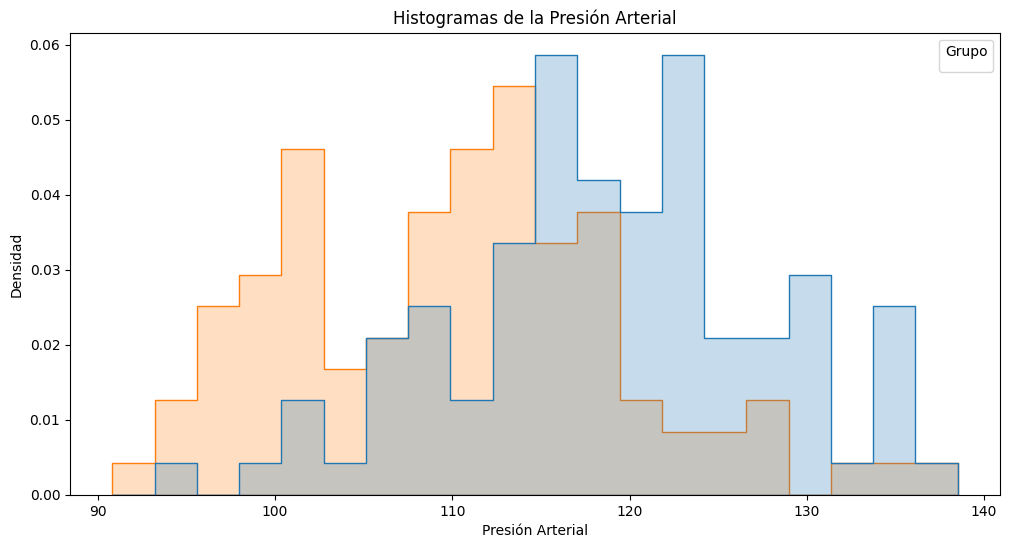

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

# Fijar la semilla para la reproducibilidad
np.random.seed(42)

# Generar dos muestras de datos
# Grupo de control (n=100)
control = np.random.normal(loc=120, scale=10, size=100)  # Media = 120, Desviación estándar = 10
# Grupo de tratamiento (n=100)
tratamiento = np.random.normal(loc=110, scale=10, size=100)  # Media = 110, Desviación estándar = 10

# Crear un DataFrame
data = pd.DataFrame({
    'Grupo': ['Control'] * 100 + ['Tratamiento'] * 100,
    'Presion_Arterial': np.concatenate([control, tratamiento])
})

# Graficar histogramas
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Presion_Arterial', hue='Grupo', element='step', stat='density', bins=20, common_norm=False)
plt.title('Histogramas de la Presión Arterial')
plt.xlabel('Presión Arterial')
plt.ylabel('Densidad')
plt.legend(title='Grupo')
plt.show()

## VERIFICAR NORMALIDAD Y HOMOCEDASTICIDAD

In [7]:
# Verificar normalidad con la prueba de Shapiro-Wilk
normalidad_control = pg.normality(control)
normalidad_tratamiento = pg.normality(tratamiento)

print("Resultados de la normalidad:")
print("Grupo Control:\n", normalidad_control)
print("Grupo Tratamiento:\n", normalidad_tratamiento)

# Verificar homocedasticidad con la prueba de Levene
homocedasticidad = pg.homoscedasticity(data, dv='Presion_Arterial', group='Grupo')
print("\nResultados de homocedasticidad:\n", homocedasticidad)

Resultados de la normalidad:
Grupo Control:
           W      pval  normal
0  0.989883  0.655168    True
Grupo Tratamiento:
           W      pval  normal
0  0.977534  0.085256    True

Resultados de homocedasticidad:
                W      pval  equal_var
levene  0.180383  0.671505       True


## LANZAMOS T-STUDENT

In [11]:
# Realizar el t-test
t_test = pg.ttest(x=control, y=tratamiento, paired=False)

# Mostrar resultados del t-test
print("\nResultados del T-Test:")
print(t_test)


Resultados del T-Test:
               T  dof alternative         p-val          CI95%   cohen-d  \
T-test  6.635596  198   two-sided  3.023031e-10  [6.14, 11.34]  0.938415   

            BF10     power  
T-test  2.81e+07  0.999998  


# Diferencias entre Cohen's d y Potencia Estadística en Pingouin

## Cohen's d

- **Definición**: Cohen's d es una medida del tamaño del efecto que cuantifica la diferencia entre dos grupos en términos de desviaciones estándar. Se utiliza para entender la magnitud de la diferencia observada positiva o negativa entre las medias de dos grupos.

- **Cálculo**: Se calcula utilizando la siguiente fórmula:

  $$
  d = \frac{\bar{X}_1 - \bar{X}_2}{s}
  $$

  donde $\bar{X}_1$ y $\bar{X}_2$ son las medias de los dos grupos, y $s$ es la desviación estándar combinada de ambos grupos.

- **Interpretación**:
  - Un $d$ pequeño (0.2) indica un tamaño de efecto pequeño.
  - Un $d$ moderado (0.5) sugiere un tamaño de efecto mediano.
  - Un $d$ grande (0.8 o más) indica un tamaño de efecto grande, lo que significa que la diferencia entre los grupos es considerable.

- **Uso en Pingouin**: La función `pg.compute_effsize()` en Pingouin permite calcular Cohen's d para diferentes tipos de comparaciones, como pruebas de t y ANOVA.

## Potencia (Power)

- **Definición**: La potencia estadística es la probabilidad de que un test estadístico detecte un efecto real cuando realmente existe. Es una medida de la capacidad de una prueba para evitar un error tipo II (no detectar una diferencia cuando sí la hay).

- **Cálculo**: La potencia depende de varios factores, incluyendo:
  - **Tamaño del efecto**: Un tamaño del efecto mayor generalmente aumenta la potencia.
  - **Tamaño de la muestra**: Un mayor tamaño de muestra también aumenta la potencia.
  - **Nivel de significancia ($\alpha$)**: Un nivel de significancia más alto puede aumentar la potencia, pero a costa de aumentar el riesgo de un error tipo I (rechazar incorrectamente la hipótesis nula).

- **Interpretación**:
  - Una potencia de 0.8 o superior se considera adecuada para la mayoría de las investigaciones, ya que indica que hay un 80% de probabilidad de detectar un efecto si realmente se encuentra.
  - Potencias por debajo de 0.5 indican un riesgo significativo de no detectar un efecto, mientras que potencias cerca de 0.7 sugieren que el poder está en un rango aceptable pero no ideal.

- **Uso en Pingouin**: La función `pg.power_ttest()` permite calcular la potencia para análisis específicos de pruebas t basándose en parámetros como el tamaño del efecto, el tamaño de la muestra y el nivel de significancia.

## Resumen de Diferencias

| **Criterio**         | **Cohen's d**                              | **Potencia (Power)**                             |
|----------------------|--------------------------------------------|--------------------------------------------------|
| **Propósito**        | Medir el tamaño del efecto de una diferencia entre grupos | Evaluar si se detectará un efecto real en la prueba estadística |
| **Interpretación**   | Indica la magnitud de la diferencia       | Indica la probabilidad de detectar una diferencia significativa |
| **Cálculo**          | Basado en medias y desviaciones estándar   | Basado en tamaño del efecto, tamaño de muestra y nivel de significancia |
| **Uso común**        | Para evaluar resultados de experimentos    | Para diseñar estudios y garantizar suficiente poder estadístico |

Ambos conceptos son fundamentales en análisis estadísticos y son complementarios; Cohen's d te dice cuán fuerte es una relación, mientras que la potencia te dice qué tan probable es que detectes efectivamente esa relación en un estudio.

# EJEMPLO CON MENOR VALOR DE POTENCIA



<ipython-input-15-1a836fc8186e>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Grupo')


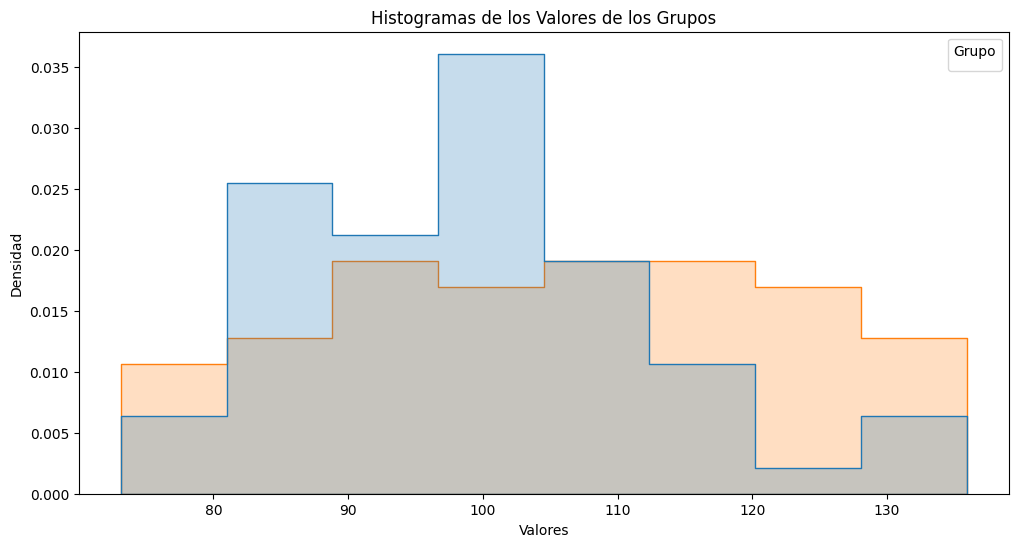

In [15]:
# Definimos el tamaño de la muestra
n = 60  # Tamaño de la muestra por grupo

# Generar dos muestras de datos
# Grupo de control (n=60)
control = np.random.normal(loc=98, scale=15, size=n)  # Media = 100, Desviación estándar = 15
# Grupo de tratamiento (n=60)
tratamiento = np.random.normal(loc=105, scale=15, size=n)  # Media = 105, Desviación estándar = 15

# Crear un DataFrame
data = pd.DataFrame({
    'Grupo': ['Control'] * n + ['Tratamiento'] * n,
    'Valor': np.concatenate([control, tratamiento])
})

# Graficar histogramas
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Valor', hue='Grupo', element='step', stat='density', common_norm=False)
plt.title('Histogramas de los Valores de los Grupos')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.legend(title='Grupo')
plt.show()

## VERIFICAMOS NORMALIDAD Y HOMOCEDASTICIDAD

In [16]:
# Verificar normalidad con la prueba de Shapiro-Wilk
normalidad_control = pg.normality(control)
normalidad_tratamiento = pg.normality(tratamiento)

print("Resultados de la normalidad:")
print("Grupo Control:\n", normalidad_control)
print("Grupo Tratamiento:\n", normalidad_tratamiento)

# Verificar homocedasticidad con la prueba de Levene
homocedasticidad = pg.homoscedasticity(data, dv='Valor', group='Grupo')
print("\nResultados de homocedasticidad:\n", homocedasticidad)

Resultados de la normalidad:
Grupo Control:
         W      pval  normal
0  0.9684  0.121795    True
Grupo Tratamiento:
           W     pval  normal
0  0.974698  0.24604    True

Resultados de homocedasticidad:
                W      pval  equal_var
levene  5.728729  0.018266      False


# CUMPLE CRITERIOS PARA T-STUDENT

In [17]:
# Realizar el t-test
t_test = pg.ttest(x=control, y=tratamiento, paired=False)

# Mostrar resultados del t-test
print("\nResultados del T-Test:")
print(t_test)


Resultados del T-Test:
              T  dof alternative     p-val           CI95%   cohen-d   BF10  \
T-test -2.20256  118   two-sided  0.029569  [-11.36, -0.6]  0.402131  1.698   

          power  
T-test  0.58889  


## OBSERVAR LOS RESULTADOS

ESpecialmente los valores:
- p-val
- cohen-d
- CI al 95%
- power

# AHORA EJEMPLO CON TEST NO PARAMÉTRICO

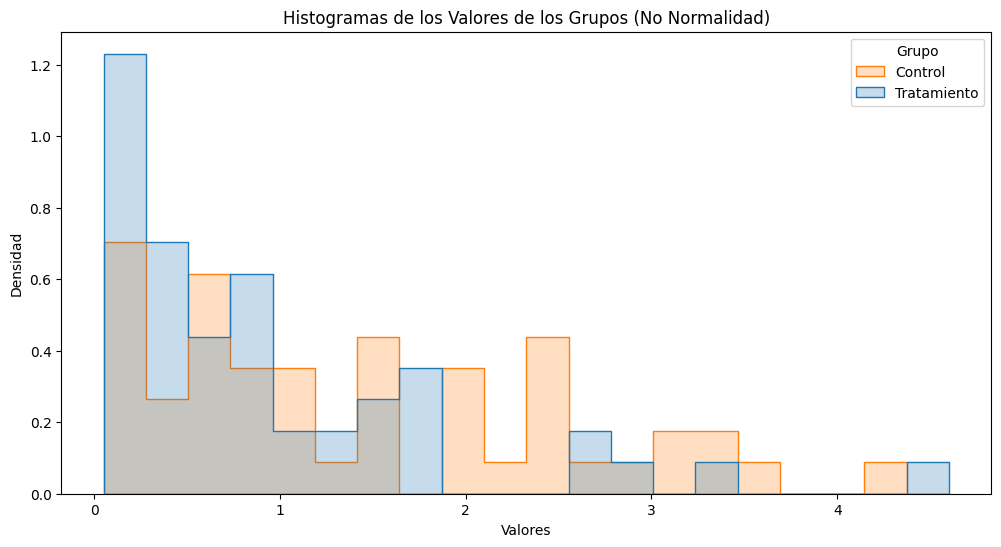

In [19]:
# Definimos el tamaño de la muestra
n = 50  # Tamaño de la muestra por grupo

# Generar datos que no cumplen normalidad (distribución exponencial)
# Grupo de control
control = np.random.exponential(scale=1.0, size=n)  # Media > 1
# Grupo de tratamiento
tratamiento = np.random.exponential(scale=1.5, size=n)  # Media > 1.5

# Crear un DataFrame
data = pd.DataFrame({
    'Grupo': ['Control'] * n + ['Tratamiento'] * n,
    'Valor': np.concatenate([control, tratamiento])
})

# Graficar histogramas
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Valor', hue='Grupo', element='step', stat='density', common_norm=False, bins=20)
plt.title('Histogramas de los Valores de los Grupos (No Normalidad)')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.legend(title='Grupo', labels=['Control', 'Tratamiento'])
plt.show()

## CUMPLE NORMALIDAD?

Observar las diferencias entre los histogramas

In [21]:
# Verificar normalidad con la prueba de D'Agostino
from scipy.stats import normaltest
normalidad_control = normaltest(control)
normalidad_tratamiento = normaltest(tratamiento)

print("Resultados de la prueba de normalidad:")
print(f"Grupo Control: Estadístico={normalidad_control.statistic:.3f}, p-value={normalidad_control.pvalue:.3f}")
print(f"Grupo Tratamiento: Estadístico={normalidad_tratamiento.statistic:.3f}, p-value={normalidad_tratamiento.pvalue:.3f}")

Resultados de la prueba de normalidad:
Grupo Control: Estadístico=28.366, p-value=0.000
Grupo Tratamiento: Estadístico=4.596, p-value=0.100


## SE REQUIERE TEST NO PARAMÉTRICO

In [31]:
# Realizar el test de Mann-Whitney
mann_whitney_test = mannwhitneyu(control, tratamiento, alternative='two-sided')

# Mostrar resultados del test de Mann-Whitney
print("\nResultados del Test de Mann-Whitney U:")
print(f"Estadístico U: {mann_whitney_test.statistic}, p-value: {mann_whitney_test.pvalue}")

# Calcular el tamaño del efecto (r) para Mann-Whitney
n1 = len(control)
n2 = len(tratamiento)
r = mann_whitney_test.statistic / (n1 * n2)  # Cálculo del tamaño del efecto r

# Estimar potencia usando aproximación
# Esta es una aproximación muy general y no específicamente para Mann-Whitney
power = pg.power_ttest(d=r, n=min(n1, n2), alpha=0.05, alternative='two-sided')
print(f'\nLa potencia estadística aproximada basada en el tamaño del efecto es: {power:.4f}')


Resultados del Test de Mann-Whitney U:
Estadístico U: 857.0, p-value: 0.0068135084369994195

La potencia estadística aproximada basada en el tamaño del efecto es: 0.3965


## Características Intrínsecas que Afectan la Potencia

1. **Tamaño del efecto**:
   - Un mayor tamaño del efecto (la diferencia real entre las medias de las dos poblaciones) incrementa la potencia. Un test que intenta detectar una diferencia pequeña entre dos grupos tiene menos posibilidades de éxito que uno que busca diferencias grandes. Esta relación se mantiene independientemente de que el test sea paramétrico o no paramétrico.
   - Por ejemplo, si se quiere comparar dos tratamientos, un tratamiento que reduzca significativamente los síntomas tendrá un efecto más grande y será más fácil de detectar, aumentando así la potencia.

2. **Tamaño de la muestra**:
   - A medida que aumenta el tamaño de la muestra, la variabilidad de las estimaciones disminuye, lo que contribuye a una mayor potencia. Esto es cierto para ambos tipos de pruebas. Con más datos, las estimaciones de los parámetros poblacionales se vuelven más precisas, y la capacidad de detectar diferencias reales también aumenta.

3. **Variabilidad de los datos**:
   - La cantidad de varianza dentro de los grupos también afecta la potencia. Si una muestra tiene poca variabilidad, es más fácil detectar diferencias. En contraste, si hay una gran variabilidad, puede dificultar la detección de efectos, independientemente de si el test es paramétrico o no.

4. **Nivel de significancia ($\alpha$)**:
   - Elevar el nivel de significancia (por ejemplo, usar $\alpha = 0.10$ en lugar de $\alpha = 0.05$) tiende a aumentar la potencia, pero también aumenta el riesgo de cometer un error tipo I. Este ajuste es una consideración en ambas pruebas.

## Ejemplo Comparativo

Consideremos dos escenarios:

- **Test Paramétrico**: Usamos una prueba t de Student para comparar la media de dos grupos que cumplen los supuestos de normalidad.
- **Test No Paramétrico**: Usamos la prueba de Mann-Whitney U para comparar los mismos dos grupos, pero sin asumir normalidad.

En ambos casos, si el tamaño del efecto es significativo (por ejemplo, el tratamiento tiene un impacto fuerte) y tenemos un tamaño de muestra suficientemente grande con baja variabilidad, la potencia será alta para ambas pruebas. Por otro lado, si las muestras son pequeñas y los efectos son sutiles, la potencia será baja en ambos casos.

## Conclusión

La potencia de un test estadístico es influenciada por factores como el tamaño del efecto, el tamaño de la muestra, la variabilidad de los datos y el nivel de significancia. Estos factores son independientes de si se utiliza un test paramétrico o no paramétrico. Por lo tanto, entender las características intrínsecas de las muestras y el contexto del estudio es crucial para diseñar experimentos con suficiente potencia para detectar efectos importantes.


## PARA UNA MEJOR COMPRENSIÓN

Modifica el código para ir viendo como cambian los resultados.

MODIFICAR

- modificar la $n$